In [2]:
%matplotlib notebook

import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Patterns and grid creation

In [42]:
def create_random_grid(N):
    """
    Returns a grid of NxN random values with a probability
    """
    values = [ON, OFF]
    return np.random.choice(values, N*N, p=[0.2, 0.8]).reshape(N, N) 
  
    
def create_inmutable_pattern(grid):
    grid[20][30] = 1
    grid[20][31] = 1
    grid[20][32] = 1
    
    grid[30][50] = 1
    grid[30][51] = 1
    grid[30][52] = 1
    
    grid[40][60] = 1
    grid[40][61] = 1
    grid[40][62] = 1
    
    
def create_glider(i, j, grid): 
    """
    Adds a glider with top left cell at (i, j)
    """
    
    glider = np.array([[0, 0, 1],  
                       [1, 0, 1],  
                       [0, 1, 1]]) 
    grid[i:i+3:, j:j+3] = glider
    
    
def create_glider_gun(i, j, grid):
    """
    Adds a glider gun (ggun) in (i, j) position
    """
    
    ggun = np.zeros(11*38).reshape(11, 38)

    ggun[5][1] = ggun[5][2] = 1
    ggun[6][1] = ggun[6][2] = 1
  
    ggun[3][13] = ggun[3][14] = 1
    ggun[4][12] = ggun[4][16] = 1
    ggun[5][11] = ggun[5][17] = 1
    ggun[6][11] = ggun[6][15] = ggun[6][17] = ggun[6][18] = 1
    ggun[7][11] = ggun[7][17] = 1
    ggun[8][12] = ggun[8][16] = 1
    ggun[9][13] = ggun[9][14] = 1
  
    ggun[1][25] = 1
    ggun[2][23] = ggun[2][25] = 1
    ggun[3][21] = ggun[3][22] = 1
    ggun[4][21] = ggun[4][22] = 1
    ggun[5][21] = ggun[5][22] = 1
    ggun[6][23] = ggun[6][25] = 1
    ggun[7][25] = 1
  
    ggun[3][35] = ggun[3][36] = 1
    ggun[4][35] = ggun[4][36] = 1
  
    grid[i:i+11, j:j+38] = ggun


def update(data):
    global grid
    new_grid = np.copy(grid)
    #print("grid size:", grid.shape)
    for i in range(1, grid.shape[0]-1):
        for j in range(1, grid.shape[1]-1):
            neighbors = grid[i-1, j] + grid[i+1, j] + \
                        grid[i, j+1] + grid[i, j-1] + \
                        grid[i-1,j-1] + grid[i+1,j+1] + \
                        grid[i+1,j-1] + grid[i-1,j+1]
            if grid[i, j] == ON:
                if not (2 <= neighbors <= 3):
                    new_grid[i, j] = OFF
            elif grid[i, j] == OFF and neighbors == 3:
                # Grow a cell
                new_grid[i, j] = ON
            else:
                new_grid[i, j] = OFF    

    
    ### Update new grid
    mat.set_data(new_grid)
    grid = new_grid
    time.sleep(0.5)
    return grid    

## Main program

 Select an option to create:
---------------------------
    1 - Loop pattern
    2 - Simple Glider
    3 - Glider Gun
    4 - Random grid
3
Gun Glider selected


<IPython.core.display.Javascript object>


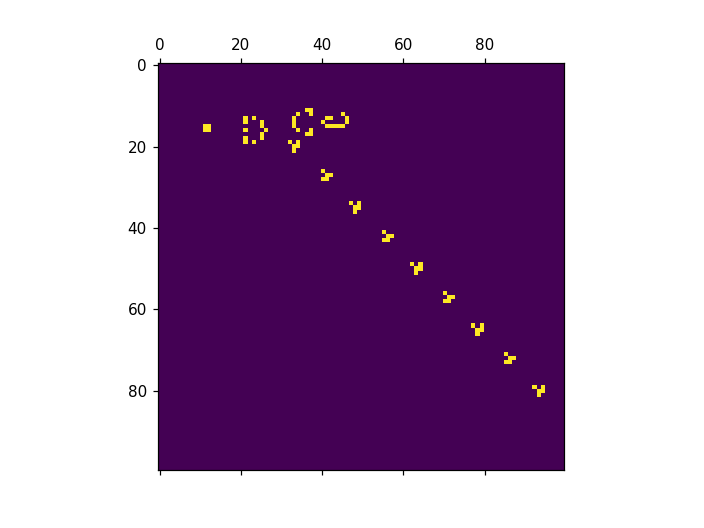

In [43]:
ON = 1
OFF = 0
N = 100
values = [ON, OFF]

menu = """ Select an option to create:
---------------------------
    1 - Loop pattern
    2 - Simple Glider
    3 - Glider Gun
    4 - Random grid
"""

grid_option = int(input(menu))
if grid_option == 1:
    print("Loop pattern selected")
    grid = np.zeros((N, N)).reshape(N, N)
    create_inmutable_pattern(grid)
elif grid_option == 2:
    print("Simple Glider selected")
    grid = np.zeros((N, N)).reshape(N, N)
    create_glider(10, 10, grid)
elif grid_option == 3:
    print("Gun Glider selected")
    grid = np.zeros((N, N)).reshape(N, N)
    create_glider_gun(10, 10, grid)
elif grid_option == 4:
    print("Random grid selected")
    grid = create_random_grid(N)

### Animation
fig, ax = plt.subplots()
mat = ax.matshow(grid)
ani = animation.FuncAnimation(fig, update,
                              frames=10,
                              interval=50,
                              save_count=50)
plt.show()